In [1]:
  pip install tensorflow tensorflow-gpu opencv-python matplotlib # type: ignore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
tf.config.list_physical_devices('GPU')


[]

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\kavin\AppData\Local\Temp\ipykernel_2276\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 
os.listdir(data_dir)


['Clean Road', 'Potholes']

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\Potholes\annotations


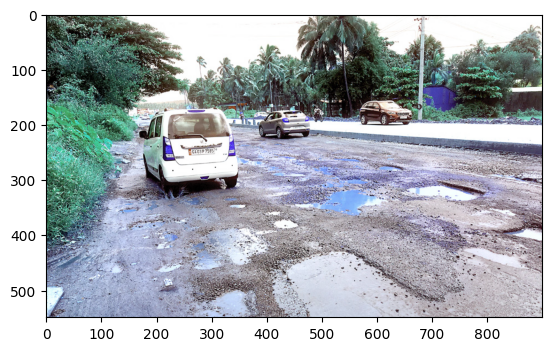

In [9]:
img=cv2.imread(os.path.join("data","Potholes","20guirim.jpg"))
img.shape
plt.imshow(img)

In [10]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data=tf.keras.utils.image_dataset_from_directory("data")

Found 972 files belonging to 2 classes.


In [13]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()



In [14]:
len(batch)

2

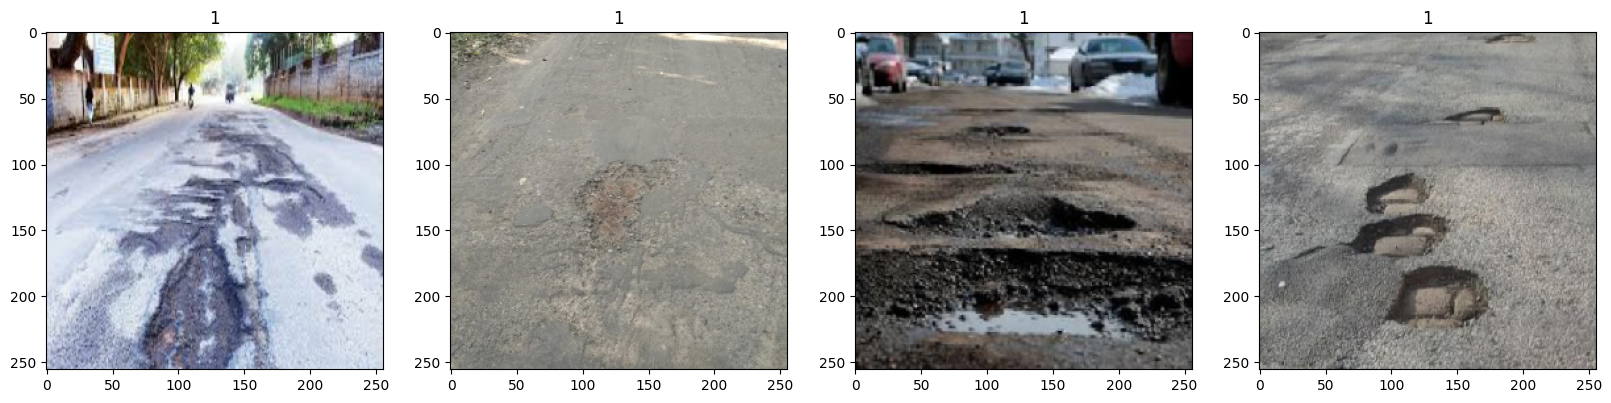

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled=batch[0]//255
scaled.max()


1.0

In [17]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()



(array([[[[0.3922526 , 0.44715455, 0.34519377],
          [0.38460094, 0.43950292, 0.33754212],
          [0.36691177, 0.42181373, 0.31985295],
          ...,
          [0.05417816, 0.073786  , 0.05025659],
          [0.05911075, 0.0787186 , 0.05518918],
          [0.06727941, 0.08688726, 0.06335784]],
 
         [[0.38460094, 0.43950292, 0.33754212],
          [0.3764706 , 0.43137255, 0.32941177],
          [0.36691177, 0.42181373, 0.31985295],
          ...,
          [0.03673024, 0.05633808, 0.03280867],
          [0.04203048, 0.06163833, 0.03810892],
          [0.05098039, 0.07058824, 0.04705882]],
 
         [[0.37966835, 0.4345703 , 0.33260953],
          [0.37169117, 0.42659312, 0.32463235],
          [0.35992646, 0.41482842, 0.31286764],
          ...,
          [0.02592295, 0.04553079, 0.02200138],
          [0.03091682, 0.05052466, 0.02699525],
          [0.03921569, 0.05882353, 0.03529412]],
 
         ...,
 
         [[0.10257353, 0.10257353, 0.06335784],
          [0.09411

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\kavin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
logdir='logs'


In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - accuracy: 0.8670 - loss: 0.5837 - val_accuracy: 0.8646 - val_loss: 0.3300
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 354ms/step - accuracy: 0.8611 - loss: 0.3598 - val_accuracy: 0.9271 - val_loss: 0.3062
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.9103 - loss: 0.2325 - val_accuracy: 0.9167 - val_loss: 0.1657
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.9407 - loss: 0.1489 - val_accuracy: 0.9531 - val_loss: 0.1014
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.9603 - loss: 0.1059 - val_accuracy: 0.9635 - val_loss: 0.1192
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - accuracy: 0.9559 - loss: 0.1252 - val_accuracy: 0.9740 - val_loss: 0.1163
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 0.9859 - loss: 0.0504 - val_accuracy: 0.9531 - val_loss: 0.1288
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 0.9857 - loss: 0.0552 - val_accuracy: 0

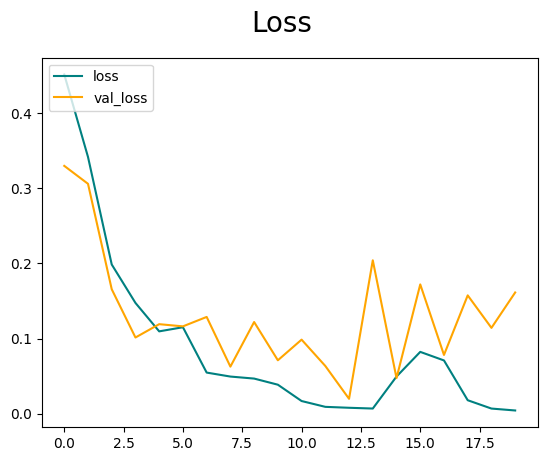

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

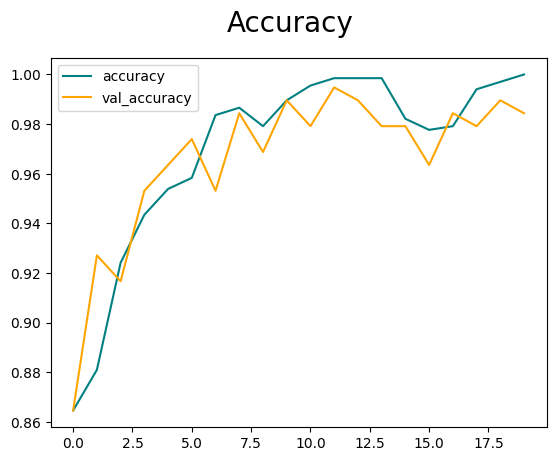

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [31]:
print("Precision:",pre.result().numpy(),"Recall:", re.result().numpy(), "Accuracy:",acc.result().numpy())

Precision: 0.9880952 Recall: 1.0 Accuracy: 0.9895833


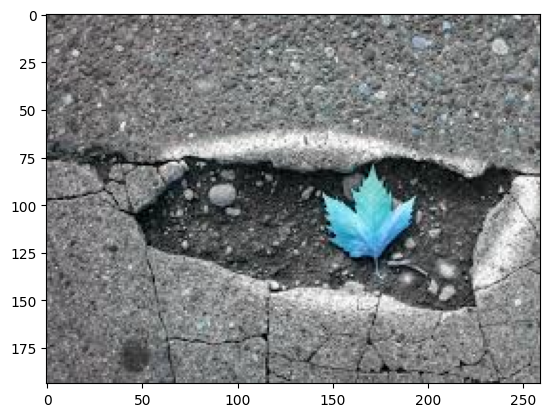

In [32]:
img = cv2.imread('images.jpg')
plt.imshow(img)
plt.show()

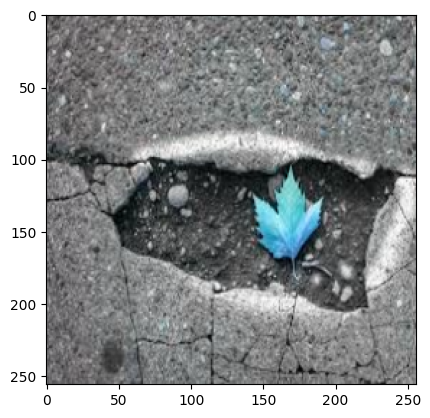

In [33]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [35]:
yhat

array([[0.9987501]], dtype=float32)

In [36]:
if(yhat>0.5):
    print("Its a plothole")
else:
    print("Its not plothole")

Its a plothole


In [37]:
from tensorflow.keras.models import load_model

In [38]:
model.save(os.path.join('models','Pothole_detection.h5'))

In [39]:
new_model = load_model(os.path.join('models','Pothole_detection.h5'))


In [40]:
model.compiled_metrics == None

False